<a href="https://colab.research.google.com/github/Marcelo0479/machinelearn/blob/main/Machine_learning_interpreting_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and preprocessingo the datas.

In [206]:
import pandas as pd

In [207]:
url = 'https://github.com/alura-cursos/alura-clustering-validation/raw/base-de-dados/CC%20GENERAL.csv'
df = pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [208]:
df.drop(columns= ['CUST_ID', 'TENURE'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [209]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [210]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [211]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

# Clustering the datas with kmeans algorithm

In [212]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5, n_init= 10, max_iter=300)
labels = kmeans.fit_predict(values)

In [213]:
from sklearn import metrics

In [214]:
# Validating the clustering with Silhouette coefficient
# For this coefficiente, the closer to 1 the better
silhouette = metrics.silhouette_score(values, labels, metric= 'euclidean')
silhouette

0.3486361382475878

In [215]:
# Validating the clustering with Davies bouldin index 
# For this index, the closer to 0 the better
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.1526565665992343

In [216]:
# Validating the clustering with Calinski Harabasz index
# For this index, the bigger the better
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3422.843133880479

# Trying to improve the valindations values changing Kmeans parameters

In [217]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters= n_clusters, n_init= 10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  silhouette = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return silhouette, dbs, calinski

In [218]:
silhouette_coeff = []
dbs_index = []
calinski_index = []
for i in range(2,20):
  _ = clustering_algorithm(i, values)
  silhouette_coeff.append(_[0])
  dbs_index.append(_[1])
  calinski_index.append(_[2])

In [219]:
def norm(valid):
  valid_norm = []
  x = min(valid)
  y = max(valid) - min(valid)
  for i in valid:
    _ = (i - x) / y
    valid_norm.append(_)
  return valid_norm

In [220]:
silhouette_coeff_norm = norm(silhouette_coeff)
dbs_index_norm = norm(dbs_index)
calinski_index_norm = norm(calinski_index)

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

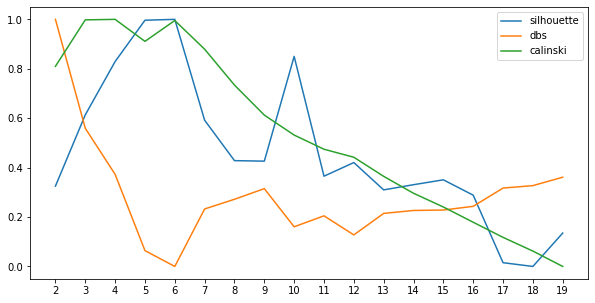

In [231]:
plt.figure(figsize=(10,5))
plt.xticks(range(2,20))
sns.lineplot(x=range(2,20), y=silhouette_coeff_norm, label= 'silhouette')
sns.lineplot(x=range(2,20), y=dbs_index_norm, label = 'dbs')
sns.lineplot(x=range(2,20), y=calinski_index_norm, label = 'calinski')

In [232]:
clustering_algorithm(6, values)

(0.3648544574844091, 1.045346318038766, 3523.516921381918)